In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn') 
import seaborn as sns

## Analysis

In [2]:
df = pd.read_csv('../data/MergeFileFinal.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerNo               5298 non-null   int64  
 1   BaseCharges              5298 non-null   float64
 2   DOC                      5298 non-null   object 
 3   TotalCharges             5288 non-null   float64
 4   DOE                      5298 non-null   object 
 5   ElectronicBilling        5298 non-null   object 
 6   ContractType             5293 non-null   object 
 7   PaymentMethod            5298 non-null   object 
 8   Retired                  5298 non-null   int64  
 9   HasPartner               5298 non-null   int64  
 10  HasDependents            5298 non-null   int64  
 11  Education                5288 non-null   object 
 12  Gender                   5294 non-null   object 
 13  DeviceProtection         5298 non-null   object 
 14  HasPhoneService         

In [3]:
df.head()

,CustomerNo,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,1201,478.50,5/1/2012,5920.00,10-Jan-11,No,One year,Electronic check,0,2,...,Male,Yes,1,Fiber optic,No,No,No,Yes,Yes,No
1,1202,103.25,5/1/2012,103.25,6-Dec-11,No,Month-to-month,Electronic check,0,2,...,Male,No internet service,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service
2,1203,399.75,5/1/2012,5217.00,10-Jan-11,Yes,Month-to-month,Bank transfer (automatic),0,2,...,Male,No,1,Fiber optic,No,No,No,Yes,No,No
3,1204,324.75,5/1/2012,22757.50,6-Apr-06,No,One year,Bank transfer (automatic),0,2,...,Male,No,1,DSL,Yes,Yes,Yes,No,No,Yes
4,1205,372.50,5/1/2012,372.50,6-Dec-11,Yes,Month-to-month,Electronic check,0,2,...,Female,No,1,Fiber optic,Yes,No,No,No,No,No


In [4]:
# how education affects churn
(
    df.groupby('Education')
    .agg({'CustomerNo':'count'
         })
)

,CustomerNo
Education,
Graduation,1370
Highschool or below,1426
Masters,1265
Other,41
ProfessionalQalification,1186


In [5]:
#see how gender plays a role
(
    df.groupby('Gender')
    .agg({'CustomerNo':'count'
         })
)

,CustomerNo
Gender,
Female,2638
Male,2656


In [6]:
(
    df.groupby('HasPhoneService')
    .agg({'CustomerNo':'count'
         })
)

,CustomerNo
HasPhoneService,
0,506
1,4792


<AxesSubplot:>

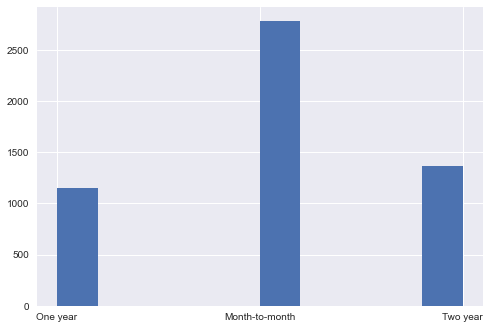

In [7]:
df['ContractType'].hist()


<AxesSubplot:>

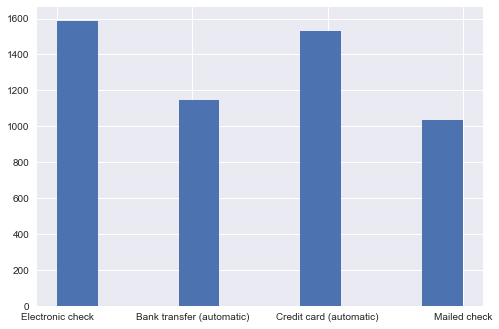

In [8]:
df['PaymentMethod'].hist()

<AxesSubplot:>

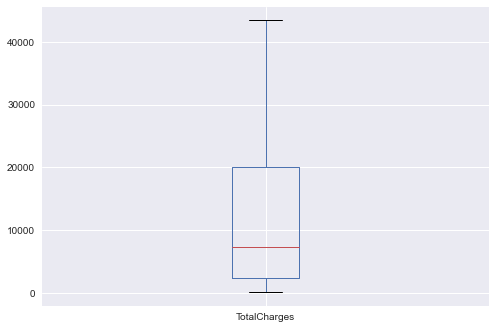

In [9]:
## see if there is a price point that churns out customers

df['TotalCharges'].plot.box()

In [11]:
df.describe(include='all')

,CustomerNo,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
count,5298.000000,5298.000000,5298,5288.000000,5298,5298,5293,5298,5298.000000,5298.000000,...,5294,5298,5298.000000,5298,5298,5298,5298,5298,5298,5298
unique,NaN,NaN,1,NaN,73,2,3,4,NaN,NaN,...,2,3,NaN,3,3,3,3,3,3,3
top,NaN,NaN,5/1/2012,NaN,6-Dec-11,Yes,Month-to-month,Electronic check,NaN,NaN,...,Male,No,NaN,Fiber optic,No,No,No,Yes,Yes,No
freq,NaN,NaN,5298,NaN,423,3120,2779,1586,NaN,NaN,...,2656,2253,NaN,2313,2491,2270,2569,2075,2075,2537
mean,3849.500000,325.467205,NaN,11928.354056,NaN,NaN,NaN,NaN,0.158362,1.502454,...,NaN,NaN,0.904492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1529.545194,151.352954,NaN,11486.453199,NaN,NaN,NaN,NaN,0.365114,0.500041,...,NaN,NaN,0.293943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1201.000000,91.250000,NaN,94.250000,NaN,NaN,NaN,NaN,0.000000,1.000000,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2525.250000,178.250000,NaN,2314.937500,NaN,NaN,NaN,NaN,0.000000,1.000000,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3849.500000,352.500000,NaN,7377.500000,NaN,NaN,NaN,NaN,0.000000,2.000000,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5173.750000,451.250000,NaN,19992.812500,NaN,NaN,NaN,NaN,0.000000,2.000000,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='PaymentMethod', ylabel='TotalCharges'>

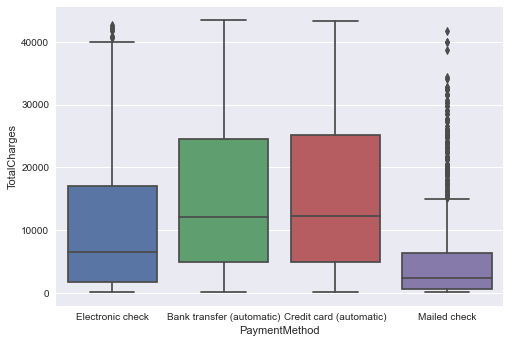

In [15]:
sns.boxplot(data=df, x='PaymentMethod', y='TotalCharges')